# `ds2s_OV_x0`のパラメータ色々変えて基本図描く

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
from ds2s_OV_x0 import ds2s_OV_x0

In [3]:
def plot_pattern(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Location of Vehicles")
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    ax.set_xlim((0, 100))
    ax.set_ylim((0, 10))
    x = np.array([[j for i in range(model.K)] for j in range(ni, nf+1)]) \
        .flatten()
    y = model.x[ni:nf+1, :model.K].flatten()
    ax.scatter(x, y, s=1)


def plot_flow(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Flow")
    ax.set_xlim((ni, nf))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    x = np.array([i for i in range(nf - ni + 1)])
    y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
    ax.plot(x, y)

def plot_fundamental(ax, model, density, flow):
    ax.set_xlabel("Density")
    ax.set_ylabel("Flow")
    ax.set_xlim((0, 1.0))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={:3.1f}, K={}, n0={}, x0={:2.1f}, v0={:2.1f}, dt={:2.1f}, dx={:2.1f}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    ax.scatter(density, flow, s=3)

In [4]:
L = 10.0
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0

## $n_0$を変えてみる

In [ ]:
for n_0_ in range(0, 11):
	fig = plt.figure(figsize=(6.4 * 3, 6.4))
	ax1 = fig.add_subplot(1, 3, 1)
	ax2 = fig.add_subplot(1, 3, 2)
	ax3 = fig.add_subplot(1, 3, 3)

	density = []
	flow = []

	for K in range(101):
		sys.stdout.write("\rK = {:4d}".format(K))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0_,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
		if K == 50:
			plot_pattern(ax1, model, 0, 100)
			plot_flow(ax2, model, 0, 1000)
	plot_fundamental(ax3, model, density, flow)
	fig.savefig("./img/003_n0={:02d}.png".format(n_0_))

## $v_0$を変えてみる

In [ ]:
for v_0_ in [0.1 * i for i in range(0, 11)]:
	fig = plt.figure(figsize=(6.4 * 3, 6.4))
	ax1 = fig.add_subplot(1, 3, 1)
	ax2 = fig.add_subplot(1, 3, 2)
	ax3 = fig.add_subplot(1, 3, 3)

	density = []
	flow = []

	for K in range(101):
		sys.stdout.write("\rK = {:4d}".format(K))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0_,
			dt=dt,
			dx=dx,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
		if K == 50:
			plot_pattern(ax1, model, 0, 100)
			plot_flow(ax2, model, 0, 1000)
	plot_fundamental(ax3, model, density, flow)
	fig.savefig("./img/003_v0={:2.1f}.png".format(v_0_))


## $dx$を変えてみる

K =    3

c:\MyProgram\projects\s2s-OV-model\ds2s-OV\ds2s_OV.py:94: RuntimeWarning: divide by zero encountered in divide
  np.log(1.0 + 1.0 / e1)
c:\MyProgram\projects\s2s-OV-model\ds2s-OV\ds2s_OV.py:96: RuntimeWarning: divide by zero encountered in divide
  - np.log(1.0 + 1.0 / e2)
c:\MyProgram\projects\s2s-OV-model\ds2s-OV\ds2s_OV.py:94: RuntimeWarning: invalid value encountered in subtract
  np.log(1.0 + 1.0 / e1)


K =    8

c:\MyProgram\projects\s2s-OV-model\ds2s-OV\ds2s_OV.py:94: RuntimeWarning: overflow encountered in divide
  np.log(1.0 + 1.0 / e1)


K =   20

c:\MyProgram\projects\s2s-OV-model\ds2s-OV\ds2s_OV.py:96: RuntimeWarning: overflow encountered in divide
  - np.log(1.0 + 1.0 / e2)


K =  100

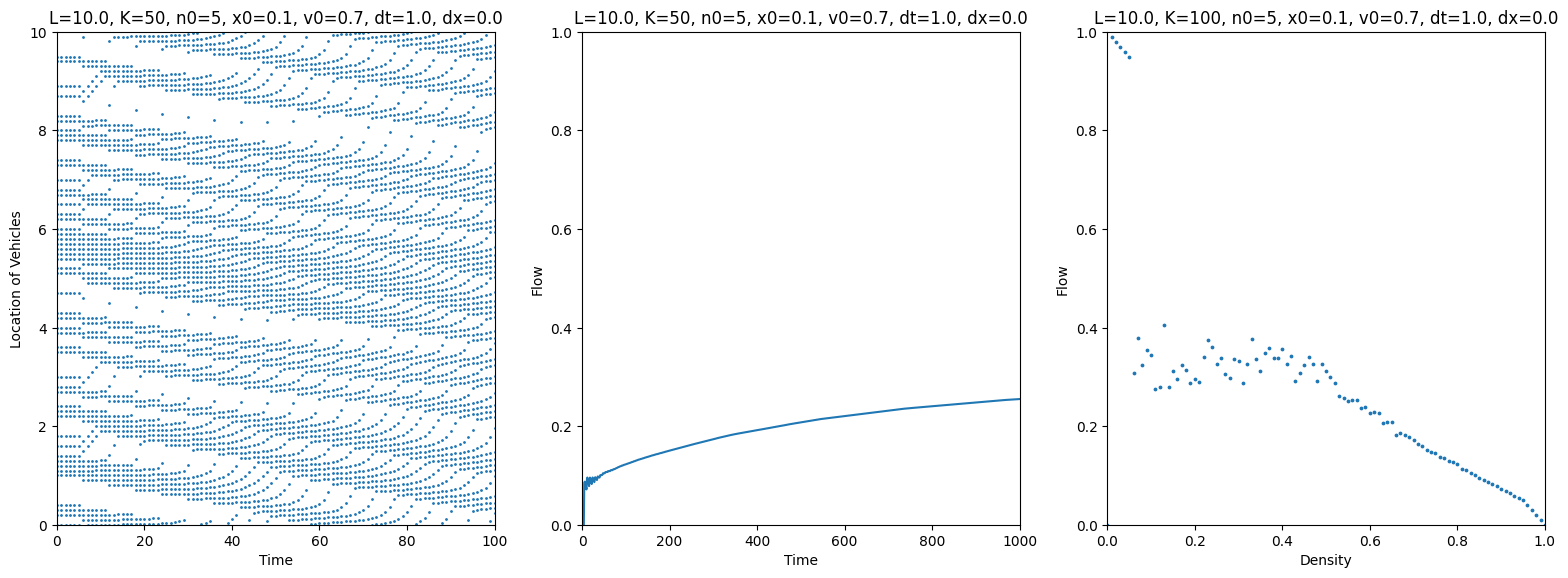

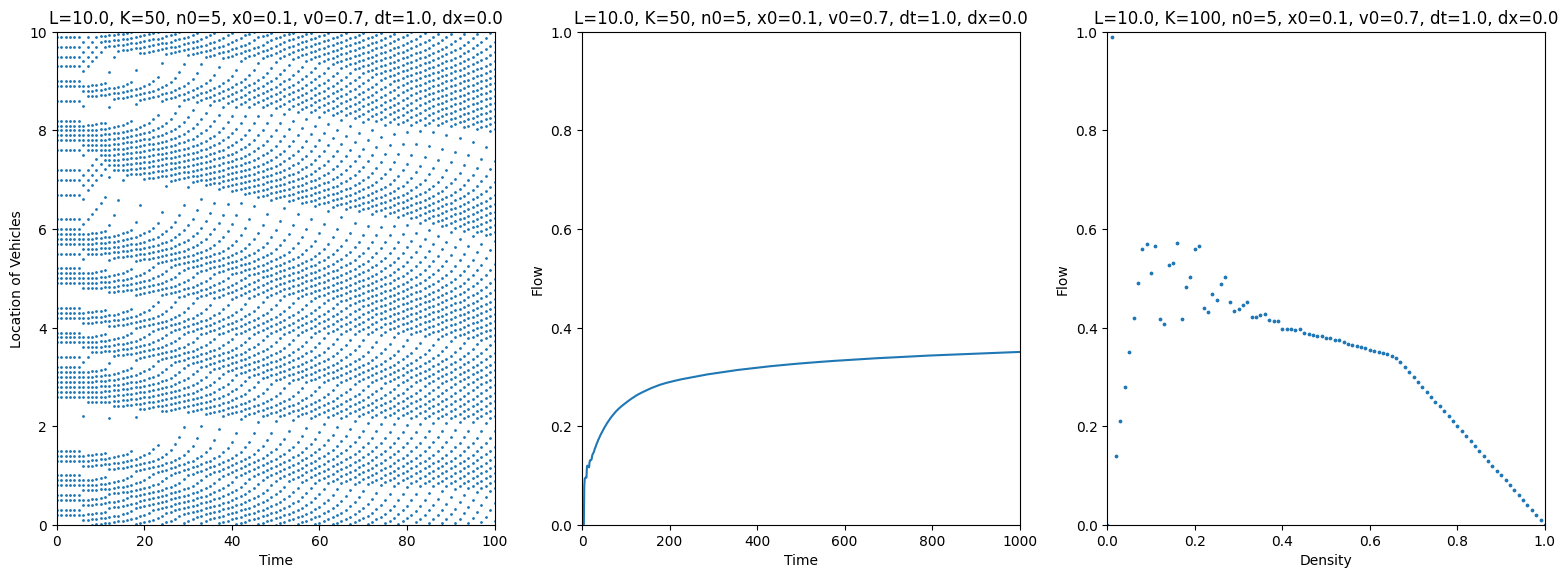

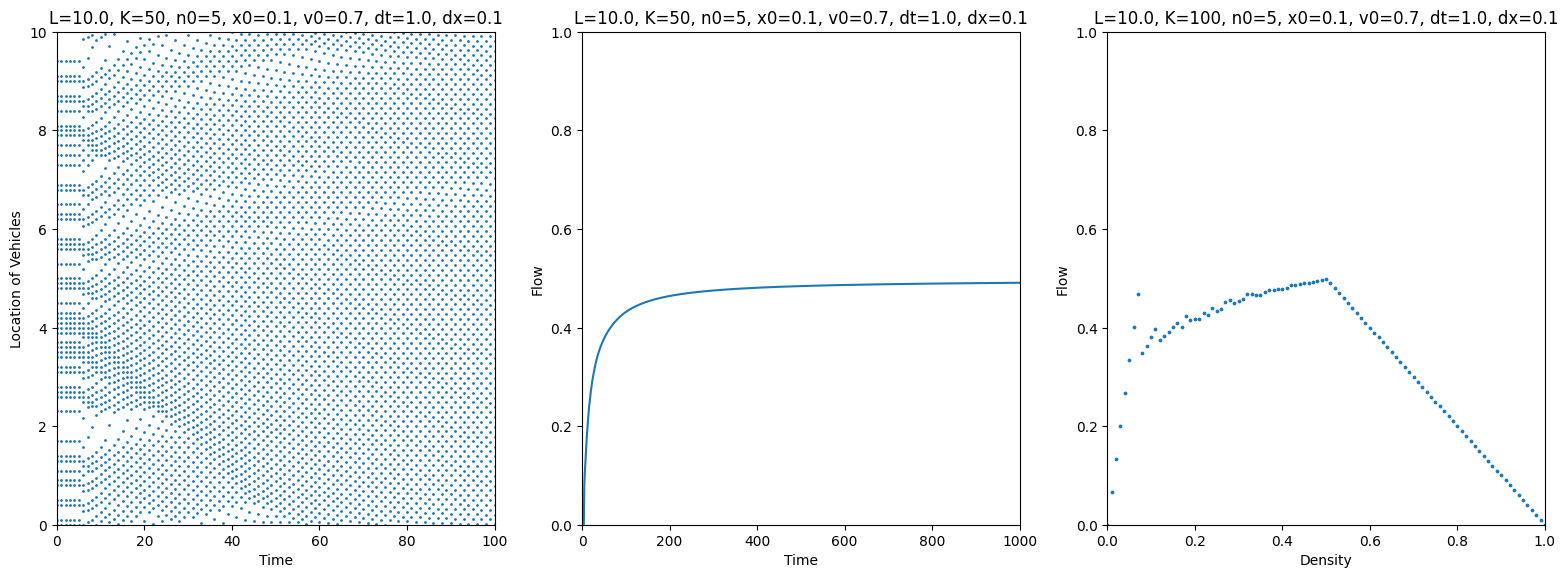

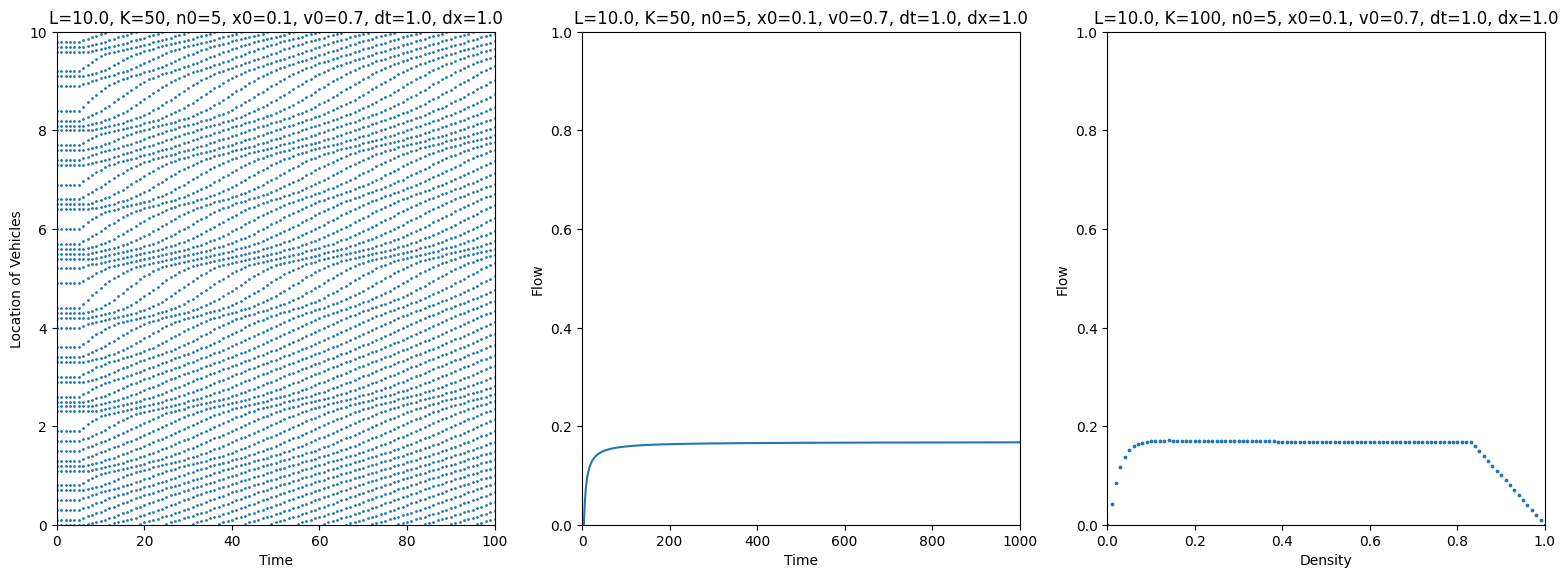

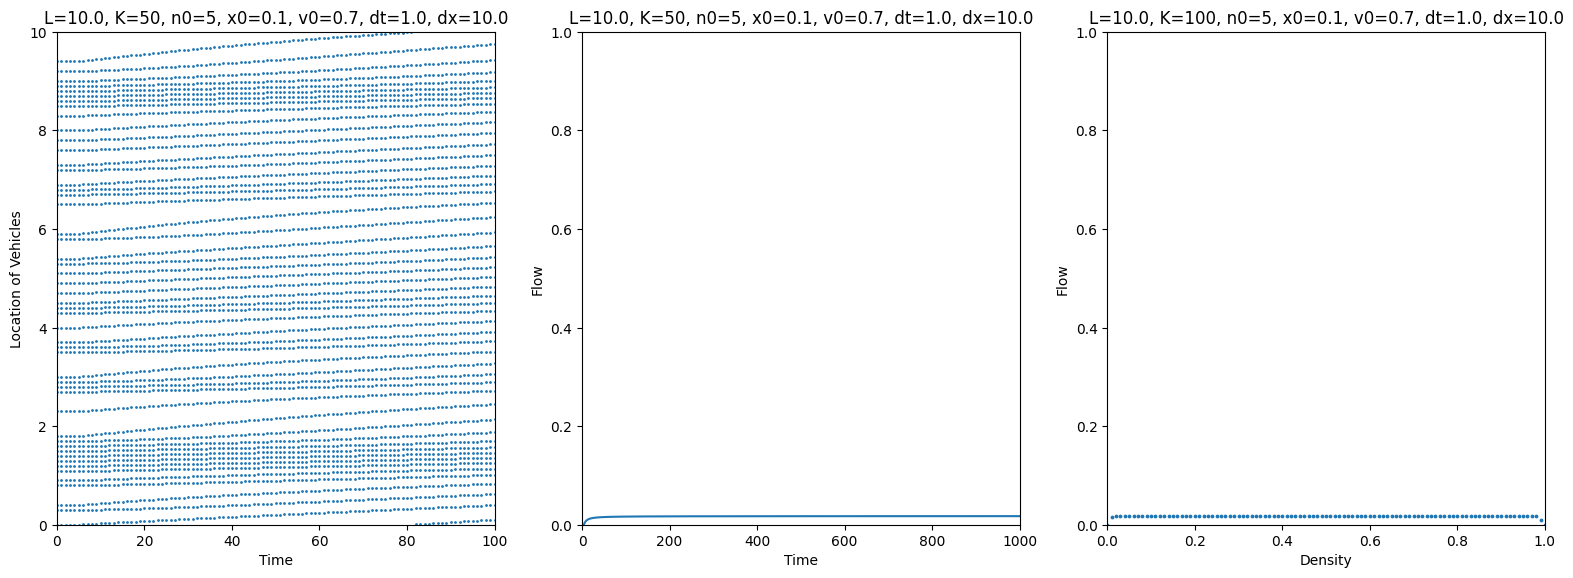

In [5]:
# いったん計算誤差は無視!!!
for dx_ in [0.001, 0.01, 0.1, 1.0, 10.0]:
	fig = plt.figure(figsize=(6.4 * 3, 6.4))
	ax1 = fig.add_subplot(1, 3, 1)
	ax2 = fig.add_subplot(1, 3, 2)
	ax3 = fig.add_subplot(1, 3, 3)

	density = []
	flow = []

	for K in range(101):
		sys.stdout.write("\rK = {:4d}".format(K))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx_,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
		if K == 50:
			plot_pattern(ax1, model, 0, 100)
			plot_flow(ax2, model, 0, 1000)
	plot_fundamental(ax3, model, density, flow)
	fig.savefig("./img/003_dx={:.3f}.png".format(dx_))

K =  100

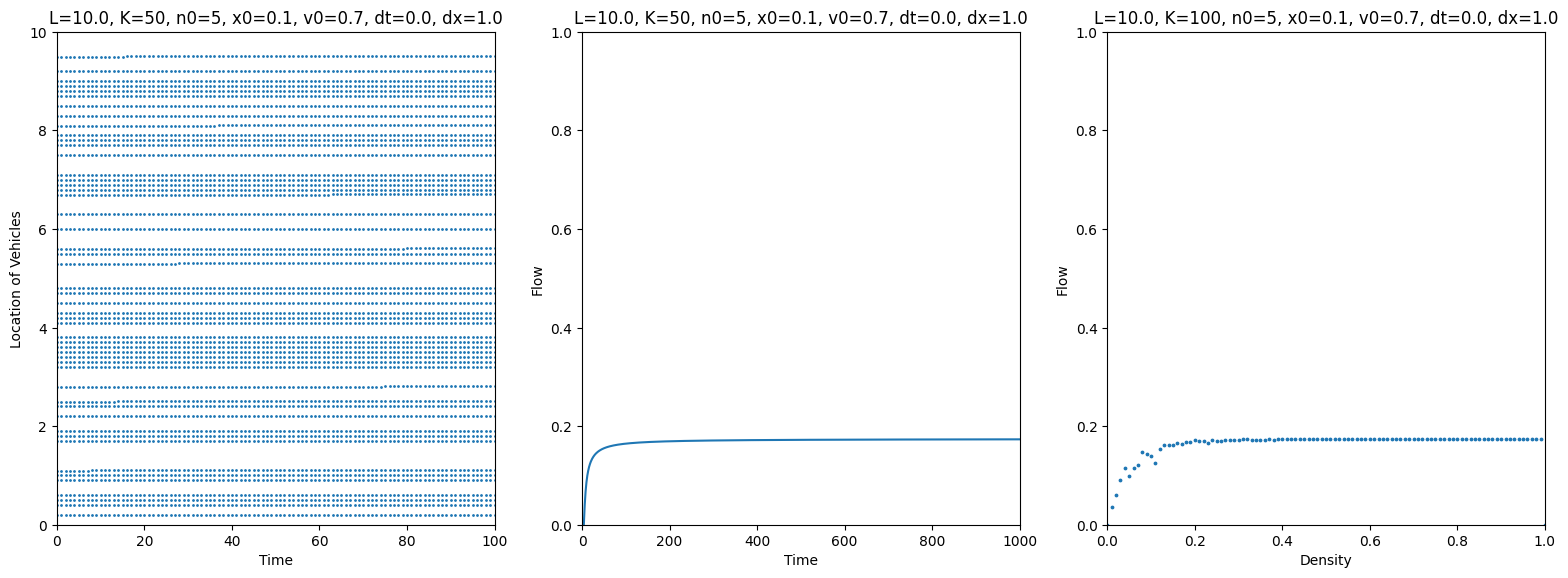

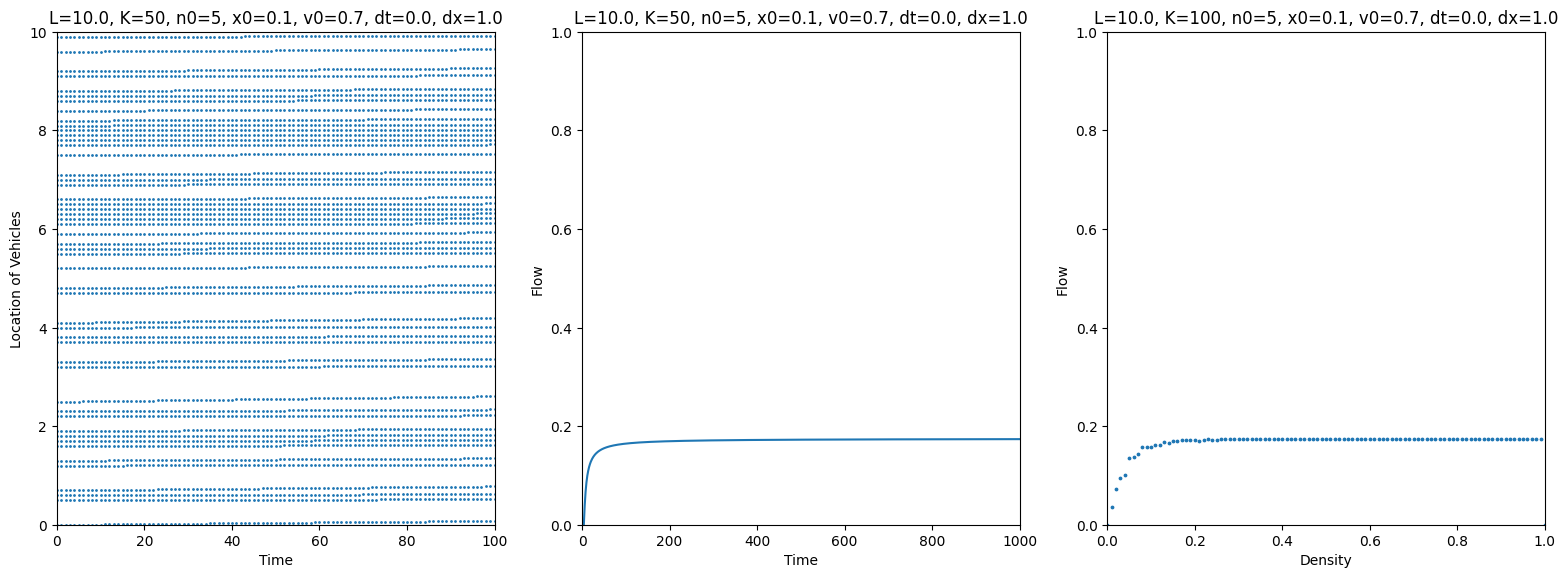

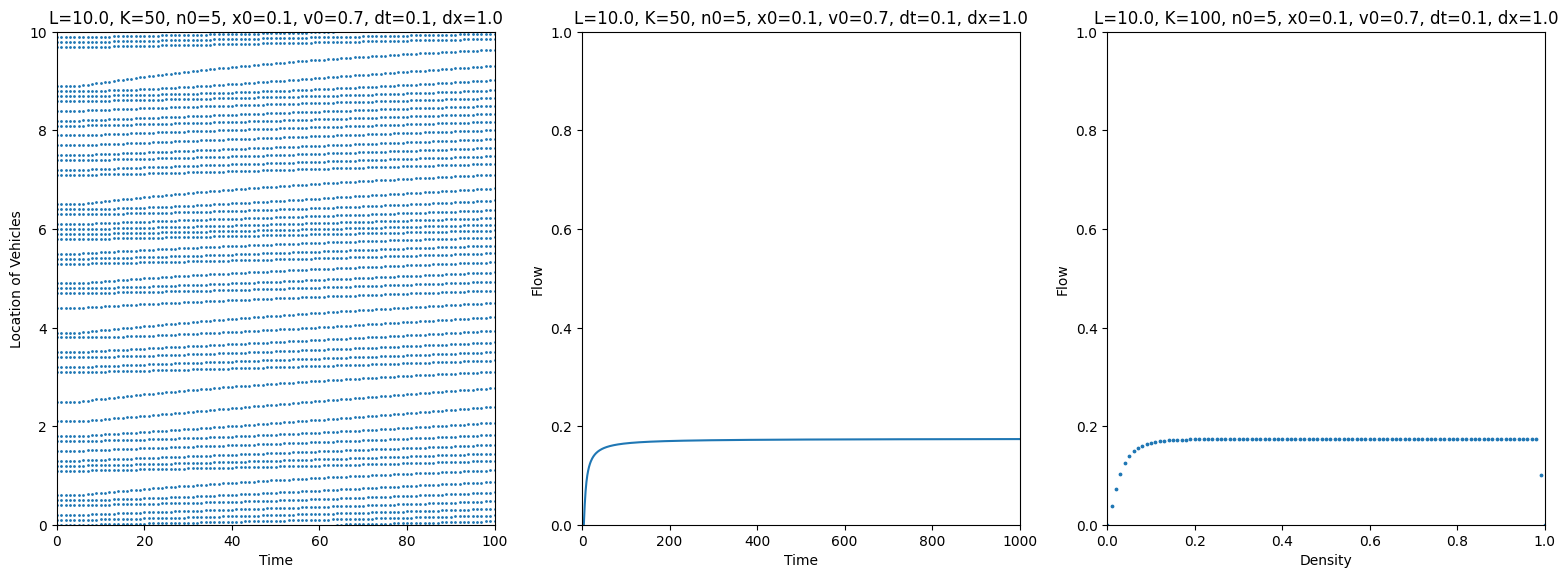

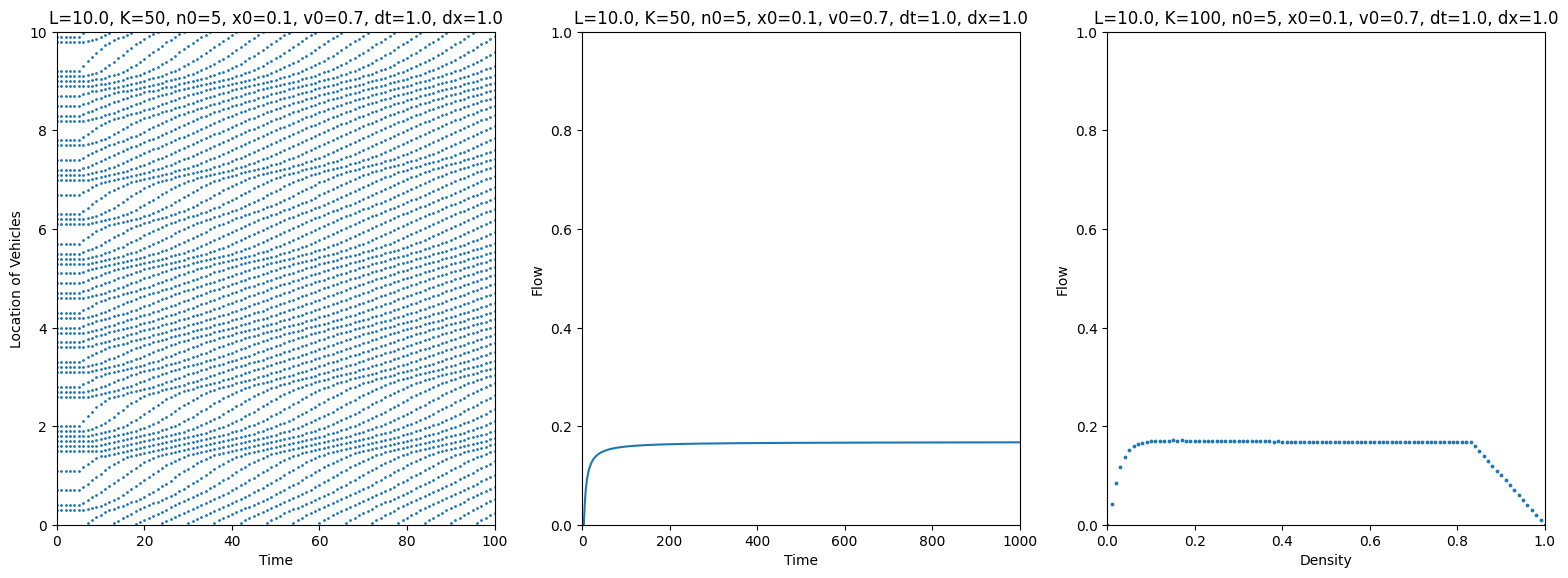

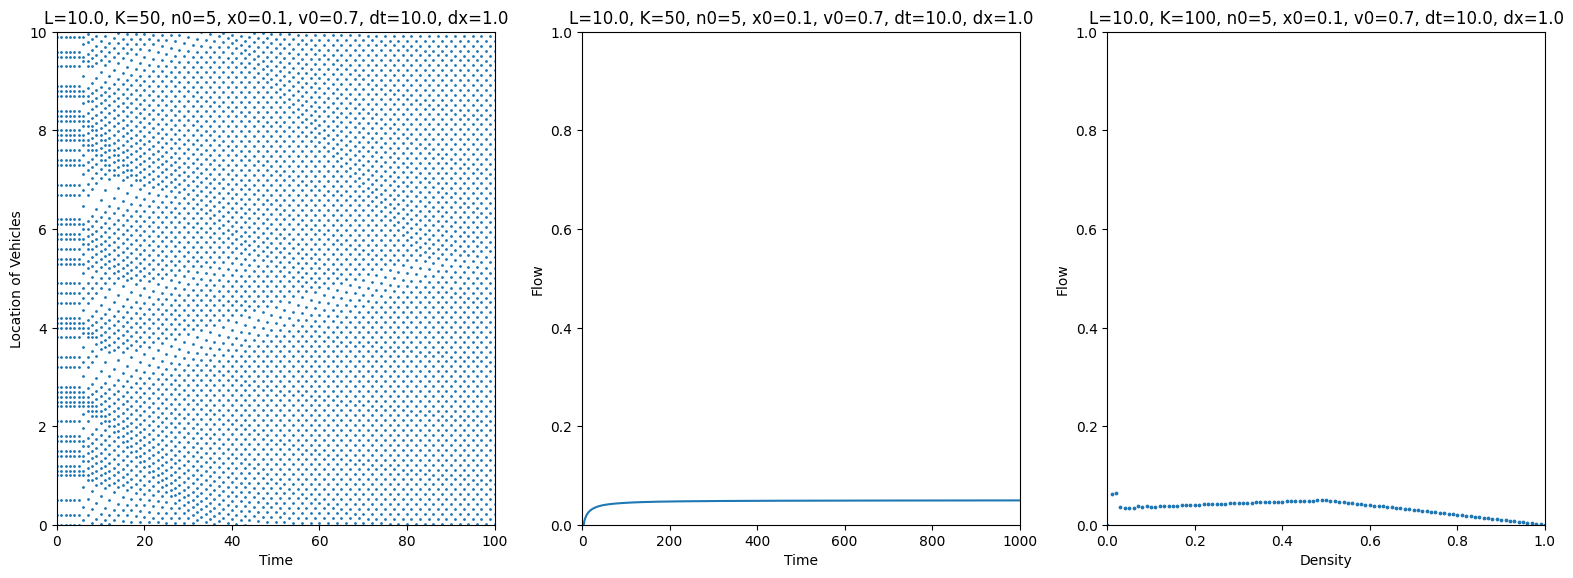

In [21]:
# いったん計算誤差は無視!!!
for dt_ in [0.001, 0.01, 0.1, 1.0, 10.0]:
	fig = plt.figure(figsize=(6.4 * 3, 6.4))
	ax1 = fig.add_subplot(1, 3, 1)
	ax2 = fig.add_subplot(1, 3, 2)
	ax3 = fig.add_subplot(1, 3, 3)

	density = []
	flow = []

	for K in range(101):
		sys.stdout.write("\rK = {:4d}".format(K))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_x0(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt_,
			dx=dx,
			x_init=x_init,
			n_max=1010
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(800, 1000))
		if K == 50:
			plot_pattern(ax1, model, 0, 100)
			plot_flow(ax2, model, 0, 1000)
	plot_fundamental(ax3, model, density, flow)
	fig.savefig("./img/003_dt={:.3f}.png".format(dx_))